## Question 1

https://projecteuler.net/problem=5 . [Pass-level] 2520 is the smallest number that can be divided by each of the numbers from 1 to 10 without any remainder. What is the smallest positive number that is evenly divisible by all of the numbers from 1 to n?

In [4]:
from math import gcd
def lcm(a,b):
    "Calculate the lowest common multiple of two integers a and b"
    return a*b//gcd(a,b)

from functools import reduce
reduce(lcm, range(1,100+1))

69720375229712477164533808935312303556800

In [17]:
def find_gcd(x,y):
    while y:
        x,y =y,x%y
    return x

find_gcd(3,6)
def find_smallest_dividend_1(n):
    if n<=0:
        return False
    elif n==1:
        return 1
    else:
        step=find_smallest_dividend_1(n-1)
        return n*step//find_gcd(n,step)

find_smallest_dividend_1(100)

69720375229712477164533808935312303556800

time complexity: n log n
the best case: O(1)

the worst case:
we can see that the function makes n-1 times.However in each call, it also call a find_gcd function.
we gonna find the time complexity for find_gcd()
Consider find_gcd(a,b) with b<=a.
if b < a/2, then the next step: a,b = b,a%b will make the new value a always less than a/2,since the % operation will remove b or more from a.
if b > a/2, then the next step: a,b = b,a%b will make the new value b always less than a/2 since the
if b==2, it is the best case so we dont consider

so for each recursive step, the find_gcd() will cut a or b in half.

Therefore, the big O notation of find_gcd(a,b) is O(log(a)) with a >=b


We see that usually find_smallest_dividend_1(n-1)> n (excepts n<=3).
big O notation of find_gcd(n,find_smallest_dividend_1(n-1)) is O(log(find_smallest_dividend_1(n-1))).
However, find_smallest_dividend_1(n-1) = c*(n-1)=c*n-c =< c*n with c is a constant.
therefore, big O notation of find_gcd(n,find_smallest_dividend_1(n-1)) is log(n).

we have (n-1) calls for find_smallest_dividend_1() function, and in each call we call a find_gcd() function.
Therefore, the big O notation of find_smallest_dividend_1() is n*log(n) with log is logarith base 2

determine the memory usage of this algorithm, because it is a recursion

In [1]:
def find_smallest_dividend_2(n):
    if n <= 1:
        return 1
    else:
        step = find_smallest_dividend_2(n - 1)
        if(step%n==0):
            return step
        else:
            number = 1
            found = False
            while not found:
                number += 1
                found = ((step*number)%n ==0)
            return number*step
print(find_smallest_dividend_2(10))

2520


We see that find_smallest_dividend_2(n) will make (n-1) recursive calls.
in each call, we also conduct a while loop
this while loop in worst case will loop n times if the highest common factor between step value and n is 1.
Therefore, the big O notation of this algorithm is n^2^.

Now I plot the time execution plot. We consider n from 1 to 100

In [41]:
def min_max_scaler(arr):
    return [(x-min(arr))/(max(arr)-min(arr)) for x in arr]
min_max_scaler([1,2,3,4])

[0.0, 0.3333333333333333, 0.6666666666666666, 1.0]

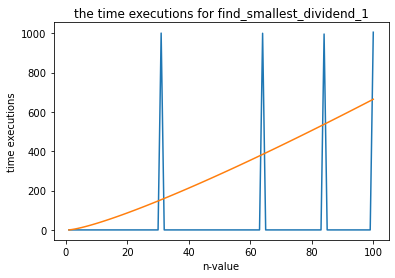

In [18]:
import time
exec_times= [] #store executing times in seconds
#I add a bit of delay so that we can see how well the model works
#the delay is proportional to the value n
# delay=0.001
for n in range(1,101):
    start = time.time()
    find_smallest_dividend_1(n)
    # time.sleep(delay*n)
    end= time.time()
    exec_times.append(end-start)
import matplotlib.pyplot as plt
import math
# I will plot the exec_times in Microseconds
plt.plot(list(range(1,101)), [1000000*x for x in exec_times])
plt.plot(list(range(1,101)),[n*math.log(n,2) for n in range(1,101)])
plt.title("the time executions for find_smallest_dividend_1")
plt.xlabel("n-value")
plt.ylabel("time executions")
plt.show()

In [7]:
begin = time.time()
time.sleep(1)
time.time()-begin

1.000450849533081

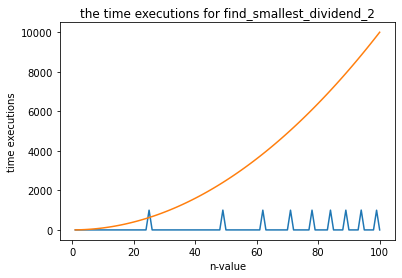

In [19]:
import time
exec_times= []
#I add a bit of delay so that we can see how well the model works
#the delay is proportional to the value n
for n in range(1,101):
    start = time.time()
    find_smallest_dividend_2(n)
    end= time.time()
    exec_times.append(end-start)
import matplotlib.pyplot as plt
import math
plt.plot(list(range(1,101)), [1000000*x for x in exec_times])
plt.plot(list(range(1,101)),[n*n for n in range(1,101)])
plt.title("the time executions for find_smallest_dividend_2")
plt.xlabel("n-value")
plt.ylabel("time executions")
plt.show()

From two graph we can see that find_smallest_dividend_1 is better because when n move from 1 to 100, there are less peak points in the time executions in find_smallest_dividend_1 than find_smallest_dividend_2

## https://projecteuler.net/problem=7 . [Credit-level] By listing the first six prime numbers: 2, 3, 5, 7, 11, and 13, we can see that the 6th prime is 13. What is the n’s prime number?

this algorithm is really slow. can use as a slow algorithm

In [1]:
# returns True if parameter n is a prime number, False if composite and "Neither prime, nor composite" if neither
import math
def is_prime(num):
    if num<2:
        return False
    if num==2:
        return True
    if num==3:
        return True
    if (num + 1)%6 == 0 or (num - 1)%6 == 0: #if the remainder of num/6 is 0,2,3,4 => not prime
        for i in range(2, int(round(math.sqrt(num) + 1))):
            if num%i == 0:
                return False
        return True
    return False

# print(isPrime(5))

# returns the nth prime number
def find_nth_prime_2(n):
    counter = 0
    prime = 1

    while counter < n:
        prime += 1
        if is_prime(prime):
            counter += 1
    return prime

print(find_nth_prime_2(100))

541


time complexity:
in side while loop, each iteration calls is_prime(prime) with current prime number.
inside is_prime(num), even we can ignore 4/6 instances by a simple comparision if (num + 1)%6 == 0 or (num - 1)%6 == 0, however, in the worst case, the for loop still loop from 2 to sqrt(num). Therefore, is_prime(num) is O(sqrt(num)).


back to find_nth_prime_2(n), we can not specify a direct number of iterations that  the "while" loop will execute. However, by using prime number theorem (https://en.wikipedia.org/wiki/Prime_number_theorem and http://www.fen.bilkent.edu.tr/~franz/nt/cheb.pdf) we can determine the upper bound of nth number n*ln(n)+n*ln(ln(n)) for n>=6 (ln is natural log).

therefore, in worst case, the while loop can execute up to n*ln(n)+n*ln(ln(n)) times if n>=6.

in each iteration, prime  variable is passed through is_prime, not the n variable. prime will go from 2 to nth prime number
Therefore, the find_nth_prime_2(n) is O(g(x)) with g(x) is:
\begin{equation*}
\sum_{k=2}^m \sqrt{k}
\end{equation*}

with m = n*ln(n)+n*ln(ln(n)).
Because n*ln(n)+n*ln(ln(n)) is upper limit of nth prime number, the find_nth_prime_2(n) is O(g(x)) with g(x) is:
\begin{align}
\left( n*ln(n)+n*ln(ln(n))\right)*\sqrt{n*ln(n)+n*ln(ln(n))}
\end{align}

We see that ln(ln(n)) < ln(n), g(x) can be: n^1.5^*ln(n)^1.5^


In [25]:
import ctypes  # provides low-level arrays
class DynamicArray:
    """A dynamic array class akin to a simplified Python list."""

    def __init__(self, *args):
        """Create an empty array."""
        self._n = 0  # count actual elements
        self._capacity = 20  # default array capacity
        self._A = self._make_array(self._capacity)  # low-level array
        if len(args) < 1:
            self.resize_factor = 2
        else:
            self.resize_factor = int(args[0])

    def __len__(self):
        """Return number of elements stored in the array."""
        return self._n

    def __getitem__(self, k):
        """Return element at index k."""
        if k==-1:
            k=self._n-1
        if not 0 <= k < self._n:
            raise IndexError('invalid index')
        return self._A[k]  # retrieve from array

    def append(self, obj):
        """Add object to end of the array."""
        if self._n == self._capacity:  # not enough room
            self._resize(self.resize_factor * self._capacity)  # so double capacity
        self._A[self._n] = obj
        self._n += 1

    def _resize(self, c):  # nonpublic utitity
        """Resize internal array to capacity c."""
        B = self._make_array(c)  # new (bigger) array
        for k in range(self._n):  # for each existing value
            B[k] = self._A[k]
        self._A = B  # use the bigger array
        self._capacity = c

    def _make_array(self, c):  # nonpublic utitity
        """Return new array with capacity c."""
        return (c * ctypes.py_object)()  # see ctypes documentation

    def insert(self, k, value):
        """Insert value at index k, shifting subsequent values rightward."""
        # (for simplicity, we assume 0 <= k <= n in this verion)
        if self._n == self._capacity:  # not enough room
            self._resize(self.resize_factor * self._capacity)  # so double capacity
        for j in range(self._n, k, -1):  # shift rightmost first
            self._A[j] = self._A[j - 1]
        self._A[k] = value  # store newest element
        self._n += 1

    def remove(self, value):
        """Remove first occurrence of value (or raise ValueError)."""
        # note: we do not consider shrinking the dynamic array in this version
        for k in range(self._n):
            if self._A[k] == value:  # found a match!
                for j in range(k, self._n - 1):  # shift others to fill gap
                    self._A[j] = self._A[j + 1]
                self._A[self._n - 1] = None  # help garbage collection
                self._n -= 1  # we have one less item
                return  # exit immediately
        raise ValueError('value not found')  # only reached if no match


In [38]:
import math
def find_nth_prime_1(n):
    if n<1:
        return "invalid input"
    elif n==1:
        return 2
    else:
        counter=1 #store the number o
        array_size=n*math.log(n) + n*math.log(math.log(n))
        primes =DynamicArray(array_size) #store the prime numbers
        primes.append(2)
        start=2
        while counter<n:
            start +=1
            if 0 not in [start%prime for prime in primes]:
                primes.append(start)
                counter+=1

        return primes[-1]

find_nth_prime_1(10001)

104743

I may change to compact array for primes variable or an stack to store the primes number

this is slow algorithm.
the most inner list we see that the it loops through a list of prime numbers which are smaller than the current number (start).
From prime number theorem as mentioned above,  π(N) ~ N/log(N) where π(N) is the prime-counting function (the number of primes less than or equal to N) and log(N) is the natural logarithm of N.
Therefore, in the most inner list comprehension, the for loop will execute num/log(num) with num equals to current number (start).
Similar to find_nth_prime_2,  while counter<n will go from start=2 to start= nth prime number. in the worst case, nth prime number can go up to n*ln(n)+n*ln(ln(n))

Therefore, the find_nth_prime_2(n) is O(g(x)) with g(x) is:
\begin{equation*}
\sum_{k=2}^m k/log(k)
\end{equation*}

with m = n*ln(n)+n*ln(ln(n))

because n*ln(n)+n*ln(ln(n)) is the upper limit of nth prime number, we can redefine g(x) as:
\begin{equation*}
m * \frac{m}{log(m)}
\end{equation*}

with log(m) is natural logarith of m with m = n*ln(n)+n*ln(ln(n))
We see that ln(ln(n)) < ln(n), and 1/log(m) <=1 with m> cai gi do sua sau, g(x) can be:
\begin{equation*}
n^2*ln(n)^2^
\end{equation*}

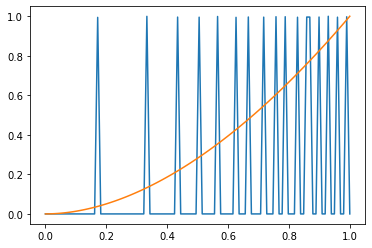

In [42]:
exec_times= []
#I add a bit of delay so that we can see how well the model works
#the delay is proportional to the value n
# delay=0.001
for n in range(1,101):
    start = time.time()
    find_nth_prime_2(n)
    # time.sleep(delay*n)
    end= time.time()
    exec_times.append(end-start)
import matplotlib.pyplot as plt
import math
plt.plot(min_max_scaler(list(range(1,101))), min_max_scaler(exec_times))
plt.plot(min_max_scaler(list(range(1,101))),min_max_scaler([(n**1.5)*(math.log(n)**1.5)for n in range(1,101)]) )
plt.show()

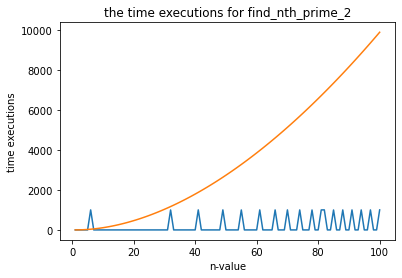

In [44]:
exec_times= []
#I add a bit of delay so that we can see how well the model works
#the delay is proportional to the value n
for n in range(1,101):
    start = time.time()
    find_nth_prime_2(n)
    end= time.time()
    exec_times.append(end-start)
import matplotlib.pyplot as plt
import math
plt.plot(list(range(1,101)), [1000000*x for x in exec_times])
plt.plot(list(range(1,101)),[(n**1.5)*(math.log(n)**1.5)for n in range(1,101)])
plt.title("the time executions for find_nth_prime_2")
plt.xlabel("n-value")
plt.ylabel("time executions")
plt.show()

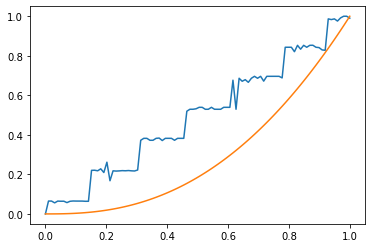

In [50]:
exec_times= []
#I add a bit of delay so that we can see how well the model works
#the delay is proportional to the value n
delay=0.001
for n in range(1,101):
    start = time.time()
    find_nth_prime_1(n)
    time.sleep(delay*n)
    end= time.time()
    exec_times.append(end-start)
import matplotlib.pyplot as plt
import math
plt.plot(min_max_scaler(list(range(1,101))), min_max_scaler(exec_times))
plt.plot(min_max_scaler(list(range(1,101))),min_max_scaler([(n**2)*(math.log(n)**2)for n in range(1,101)]) )
plt.show()

## https://projecteuler.net/problem=9 . [D-HD level] A Pythagorean triplet is a set of three natural numbers, a < b < c, for which, a2 + b2 = c2. For example, 32 + 42 = 9 + 16 = 25 = 52. Calculate (for any n) if there exists exactly one Pythagorean triplet for which a + b + c = n. If such triplet exists, find and print it.

In [ ]:
#Function to generate numbers
#with the help of hint given in question
def pythagorean_triplet():
 for a in range(1,1000):
  for b in range(1,1000):
   c = 1000-a-b
   if (a**2+b**2) == c**2:
    return a*b*c

#printing the result
print(pythagorean_triplet())

In [14]:
class Tree:

    class Node:
        __slot__="element","parent","children"
        def __init__(self, element, parent=None):
            self.element = element
            self.parent = parent
            self.children=[]

        def __eq__(self, other):
            """compare the value between two nodes"""
            return self.element==other.element

        def add_child(self,child):
            self.children.append(child)
            child.parent= self

        def has_child(self,node):
            for child in self.children:
                if child==node:
                    return True
            return False

    def __init__(self,root=None):
        self.root= root

    def add_root(self, root):
        self.root= root

    def return_abc(self):
        lst=[]
        for child in self.root.children:
            lst.append([child.children[0].children[0].element,child.children[0].element, child.element])
        return lst


In [19]:
import time
start_time = time.time()
def find_pytago_triple_1(n):
    tree= Tree()
    tree.add_root(Tree.Node(n))
    if n%2!=0:
        return n
    else:
        count=0
        for c in range(n//3+1,n//2):
            count+=1
            #I have calculate on paper
            a=(n-c)/2 - ((n/2-c/2)**2-(n-2*c)*n/2)**0.5
            b=(n-c)/2 + ((n/2-c/2)**2-(n-2*c)*n/2)**0.5
            a=int(a.real)
            b=int(b.real)
            if a**2+b**2==c**2:
                if a<1:
                    continue
                else:
                    a_node = Tree.Node(a)
                    b_node=Tree.Node(b)
                    c_node= Tree.Node(c)
                    tree.root.add_child(c_node)
                    c_node.add_child(b_node)
                    b_node.add_child(a_node)

            else:
                continue
    return tree.return_abc()

find_pytago_triple_1(100000)

[[21875, 36000, 42125], [20000, 37500, 42500]]

how about store a these in a tree and read it in preorder way. ko co su trung lap la ngon

In [17]:
# using euclid formula: https://en.wikipedia.org/wiki/Pythagorean_triple#Generating_a_triple
# look at the assignment note
def find_pytago_triple_2(n):
    if n%2!=0:
        return n
    else:
        count=0
        for x in range(1,int((n/2)**0.5)+1):
            for y in range(1,x):
                #no need to find k
                k=int(n/(x+y)/x/2)
                if k*x*(x+y)*2 != n:
                    # print("haa")
                    continue
                else:
                    print("hoh")
                    a= k*(x**2 - y**2)
                    b=2*k*x*y
                    c=k*(x**2+y**2)
                    if a+b+c == n:
                        print('--------')
                        print(k)
                        print('--------')
                        print(a)
                        print(b)
                        print(c)
                        print(a*b*c)

        # print(f"count: {count}")
find_pytago_triple_2(100000)

hoh
--------
2500
--------
37500
20000
42500
31875000000000
hoh
--------
1250
--------
20000
37500
42500
31875000000000
hoh
--------
625
--------
37500
20000
42500
31875000000000
hoh
--------
125
--------
21875
36000
42125
33173437500000
hoh
--------
100
--------
37500
20000
42500
31875000000000
hoh
--------
50
--------
20000
37500
42500
31875000000000
hoh
--------
25
--------
37500
20000
42500
31875000000000
hoh
--------
5
--------
21875
36000
42125
33173437500000
hoh
--------
4
--------
37500
20000
42500
31875000000000
hoh
--------
2
--------
20000
37500
42500
31875000000000
hoh
--------
1
--------
37500
20000
42500
31875000000000


count: 1
count: 2
count: 3
count: 5
count: 6
3
4
5
12
0
count: 7
count: 9
count: 10
count: 11
count: 13
count: 14
6
8
10
24
0
count: 15
count: 17
count: 18
5
12
13
30
0
count: 19
count: 21
count: 22
9
12
15
36
0
count: 23
count: 25
8
15
17
40
0
count: 26
count: 27
count: 29
count: 30
12
16
20
48
0
count: 31
count: 33
count: 34
count: 35
7
24
25
56
0
count: 37
count: 38
15
20
25
60
0
10
24
26
60
0
count: 39
count: 41
count: 42
count: 43
count: 45
20
21
29
70
0
count: 46
18
24
30
72
0
count: 47
count: 49
count: 50
count: 51
16
30
34
80
0
count: 53
count: 54
21
28
35
84
0
12
35
37
84
0
count: 55
count: 57
count: 58
15
36
39
90
0
9
40
41
90
0
count: 59
count: 61
count: 62
24
32
40
96
0
count: 63
count: 65
count: 66


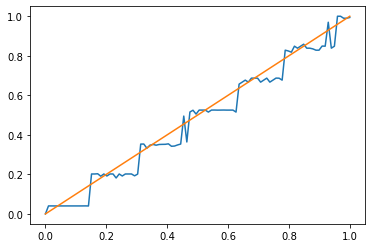

In [55]:
exec_times= []
#I add a bit of delay so that we can see how well the model works
#the delay is proportional to the value n
delay=0.001
for n in range(1,101):
    start = time.time()
    find_pytago_triple_1(n)
    time.sleep(delay*n)
    end= time.time()
    exec_times.append(end-start)
import matplotlib.pyplot as plt
import math
plt.plot(min_max_scaler(list(range(1,101))), min_max_scaler(exec_times))
plt.plot(min_max_scaler(list(range(1,101))),min_max_scaler([n for n in range(1,101)]) )
plt.show()

count: 0
count: 0
count: 0
count: 1
count: 1
--------
1
--------
3
4
5
60
count: 1
count: 1
count: 1
count: 3
count: 3
count: 3
--------
2
--------
6
8
10
480
count: 3
count: 3
count: 3
--------
1
--------
5
12
13
780
count: 3
count: 6
count: 6
--------
3
--------
9
12
15
1620
count: 6
count: 6
count: 6
count: 6
count: 6
count: 6
--------
4
--------
12
16
20
3840
--------
1
--------
12
16
20
3840
count: 6
count: 10
count: 10
count: 10
--------
1
--------
7
24
25
4200
count: 10
count: 10
--------
5
--------
15
20
25
7500
--------
2
--------
10
24
26
6240
count: 10
count: 10
count: 10
count: 10
count: 10
count: 10
--------
6
--------
18
24
30
12960
count: 15
count: 15
count: 15
count: 15
--------
1
--------
16
30
34
16320
count: 15
count: 15
--------
7
--------
21
28
35
20580
count: 15
count: 15
count: 15
--------
3
--------
15
36
39
21060
--------
1
--------
9
40
41
14760
count: 15
count: 15
count: 15
--------
8
--------
24
32
40
30720
--------
2
--------
24
32
40
30720
count: 15
count:

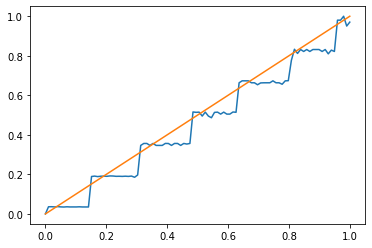

In [56]:
exec_times= []
#I add a bit of delay so that we can see how well the model works
#the delay is proportional to the value n
delay=0.001
for n in range(1,101):
    start = time.time()
    find_pytago_triple_2(n)
    time.sleep(delay*n)
    end= time.time()
    exec_times.append(end-start)
import matplotlib.pyplot as plt
import math
plt.plot(min_max_scaler(list(range(1,101))), min_max_scaler(exec_times))
plt.plot(min_max_scaler(list(range(1,101))),min_max_scaler([n for n in range(1,101)]) )
plt.show()

In [97]:
import time
start_time = time.time()
def pythagorean_triplet_m_n():
	#for loop to generate m,n
	for n in range(1,32):
		for m in range(1,n):
			a = n**2 - m**2
			b = 2*n*m
			c = n**2 + m**2
			if a+b+c == 1000:
				return a*b*c

#printing the result
print(pythagorean_triplet_m_n())
end_time = time.time()
print(end_time - start_time)

31875000
0.001001596450805664


In [100]:
for x in range(5):
    print(type(x))

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>


O(n)